# Vehicle Ownership Check

For all households in MA (or specified MPO).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

## define

In [2]:

mpos = ['BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', 'MVC',
       'MVPC', 'NMCOG', 'NPEDC', 'OCPC', 'PVPC', 'SRPEDD']

In [37]:
def veh_comp(csv_1, csv_2, csv_3, csv_4, mpo=None, percent=True):
    # read csv
    df1 = pd.read_csv(csv_1)
    df1 = df1.rename(columns={'num_households':'tdm19'})
    df2 = pd.read_csv(csv_2)
    df2 = df2.rename(columns={'num_households':'rep19'})
    df3 = pd.read_csv(csv_3)
    df3 = df3.rename(columns={'num_households':'rep22'})
    df4 = pd.read_csv(csv_4)
    df4 = df4.rename(columns={'num_households':'rep23'})

    # veh in tdm from int to str
    def veh_to_str(veh):
        if veh == 0:
            return 'zero'
        elif veh == 1:
            return '1'
        elif veh == 2:
            return '2'
        elif veh>=3:
            return '3_plus'
        else:
            return None
    df1['vehicles'] = df1['veh'].apply(veh_to_str)
    df1.drop('veh', axis=1, inplace=True)
    df1 = df1.groupby(['mpo', 'vehicles'], as_index=False).sum()

    # filter on mpo; merge 
    if mpo is None:
        df = df2.copy() # keeping 'GQ'
    else:
        df = df2[df2['mpo']==mpo].copy()

    df = df.merge(df1, on = ['mpo','vehicles'], how = 'left')
    df = df.merge(df3, on = ['mpo','vehicles'])
    df = df.merge(df4, on = ['mpo','vehicles'])
    
    # Calculating percentages
    if percent:
        df = df[df['vehicles']!='GQ'].copy()
        veh_order = ['zero', '1', '2', '3_plus'] # not including 'GQ' if percent
        df['vehicles'] = pd.Categorical(df['vehicles'], categories=veh_order, ordered=True)

        grouped_sum = df.groupby('vehicles').sum().reset_index()
        total_1 = grouped_sum['tdm19'].sum()
        total_2 = grouped_sum['rep19'].sum()
        total_3 = grouped_sum['rep22'].sum()
        total_4 = grouped_sum['rep23'].sum()
        grouped_sum['tdm19_perc'] = grouped_sum['tdm19'] / total_1 * 100
        grouped_sum['rep19_perc'] = grouped_sum['rep19'] / total_2 * 100
        grouped_sum['rep22_perc'] = grouped_sum['rep22'] / total_3 * 100
        grouped_sum['rep23_perc'] = grouped_sum['rep23'] / total_4 * 100

        draw_fields = ['tdm19_perc', 'rep19_perc','rep22_perc','rep23_perc']
    else:
        veh_order = ['zero', '1', '2', '3_plus', 'GQ']
        df['vehicles'] = pd.Categorical(df['vehicles'], categories=veh_order, ordered=True)

        grouped_sum = df.groupby('vehicles').sum().reset_index()

        draw_fields = ['tdm19', 'rep19','rep22','rep23']


    print(grouped_sum)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(16, 8))
    bar_width = 0.2
    index = range(len(grouped_sum))

    bar1 = ax.bar([p - 1.5*bar_width for p in index], grouped_sum[draw_fields[0]], bar_width, label='TDM23 2019')
    bar2 = ax.bar([p - 0.5*bar_width for p in index], grouped_sum[draw_fields[1]], bar_width, label='Replica 2019')
    bar3 = ax.bar([p + 0.5*bar_width for p in index], grouped_sum[draw_fields[2]], bar_width, label='Replica 2022')
    bar4 = ax.bar([p + 1.5*bar_width for p in index], grouped_sum[draw_fields[3]], bar_width, label='Replica 2023')

    ax.set_xlabel('Vehicle Counts')
    ax.set_ylabel('Households')
    str1 = 'Percentage' if percent else 'Number'
    if mpo is None:
        title = str1 + ' of Households by Vehicle Counts (MA)'
    else:
        title = str1 + ' of Households by Vehicle Counts ('+mpo+')'
    ax.set_title(title)
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(grouped_sum['vehicles'])
    ax.legend()

    plt.show()


## inputs

In [38]:
csv_1 = r'.\data\veh_mpo_tdm2019_v0820.csv'
csv_2 = r'.\data\veh_mpo_rep19_v0820.csv'
csv_3 = r'.\data\veh_mpo_rep22_v0820.csv'
csv_4 = r'.\data\veh_mpo_rep23_v0813.csv'


## draw

  vehicles   rep19      tdm19   rep22   rep23  tdm19_perc  rep19_perc  \
0     zero  324965   177177.0  326859  325478    6.427694   12.289268   
1        1  931123  1141464.0  958691  975978   41.410460   35.212470   
2        2  950954  1098578.0  975271  972340   39.854625   35.962423   
3   3_plus  437257   339244.0  462555  471455   12.307221   16.535838   

   rep22_perc  rep23_perc  
0   12.001978   11.856038  
1   35.202300   35.551503  
2   35.811104   35.418984  
3   16.984618   17.173475  


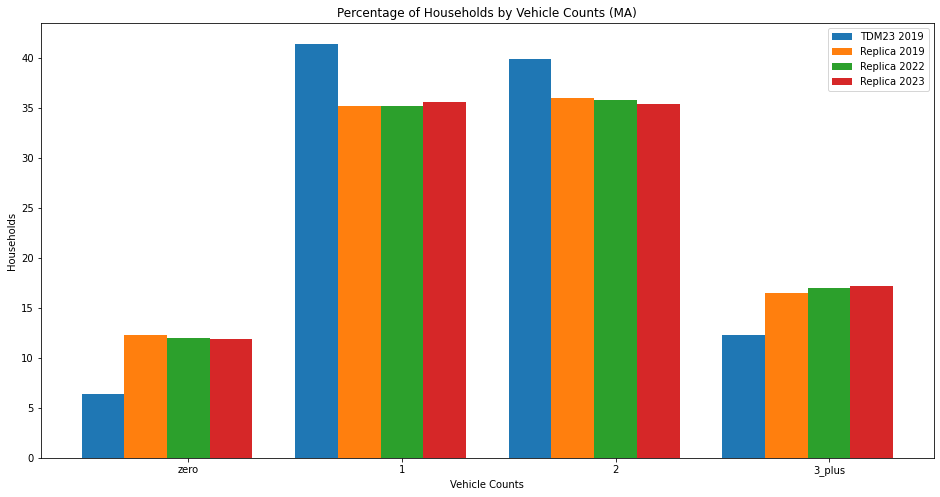

In [39]:
veh_comp(csv_1, csv_2, csv_3, csv_4) #, percent=True)

  vehicles   rep19      tdm19   rep22   rep23
0     zero  324965   177177.0  326859  325478
1        1  931123  1141464.0  958691  975978
2        2  950954  1098578.0  975271  972340
3   3_plus  437257   339244.0  462555  471455
4       GQ  247511        0.0  246195  228140


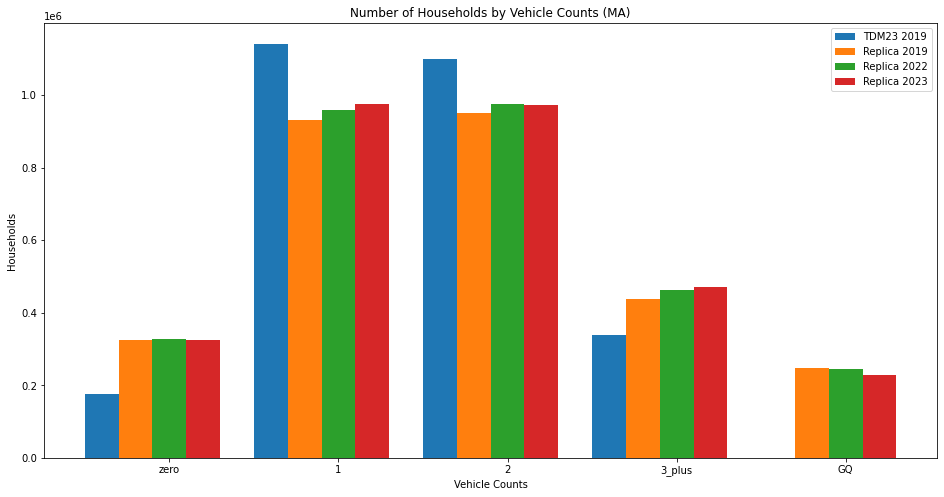

In [40]:
veh_comp(csv_1, csv_2, csv_3, csv_4, percent=False)

## By MPO

In [41]:
@interact
def va_comp_each_rpa(mpo = mpos):
    veh_comp(csv_1, csv_2, csv_3, csv_4, mpo)

interactive(children=(Dropdown(description='mpo', options=('BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', '…

BRMPO
  vehicles   rep19     tdm19   rep22   rep23  tdm19_perc  rep19_perc  \
0     zero  201890  104594.0  202930  204328    7.945500   15.841231   
1        1  469984  564573.0  483939  494862   42.887876   36.877138   
2        2  432078  508032.0  438546  435624   38.592730   33.902856   
3   3_plus  170507  139194.0  178945  180681   10.573894   13.378775   

   rep22_perc  rep23_perc  
0   15.557821   15.532404  
1   37.101644   37.617931  
2   33.621546   33.114835  
3   13.718989   13.734830  


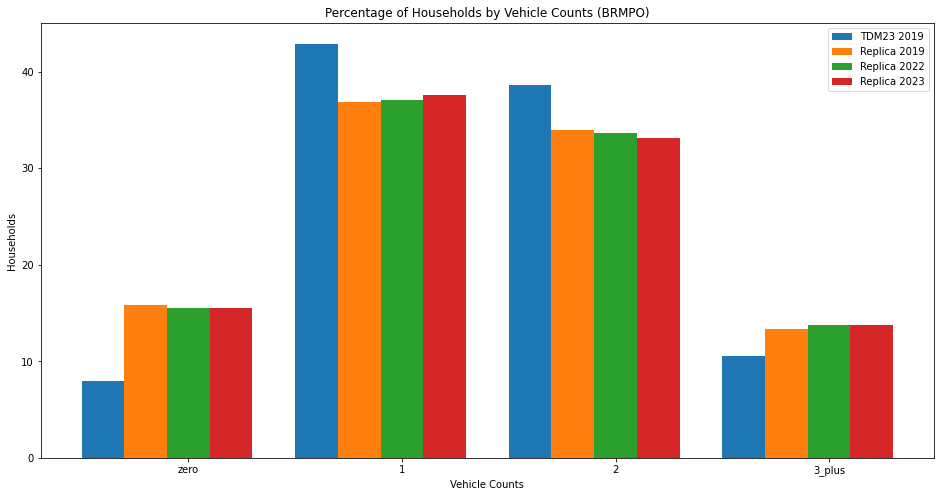

BRPC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   4928   2328.0   4952   5051    4.052219    8.976321    8.839858   
1        1  21736  26276.0  21484  21589   45.737163   39.591985   38.351274   
2        2  20079  23069.0  20882  21134   40.154917   36.573770   37.276638   
3   3_plus   8157   5777.0   8701   8694   10.055701   14.857923   15.532230   

   rep23_perc  
0    8.944889  
1   38.232273  
2   37.426507  
3   15.396331  


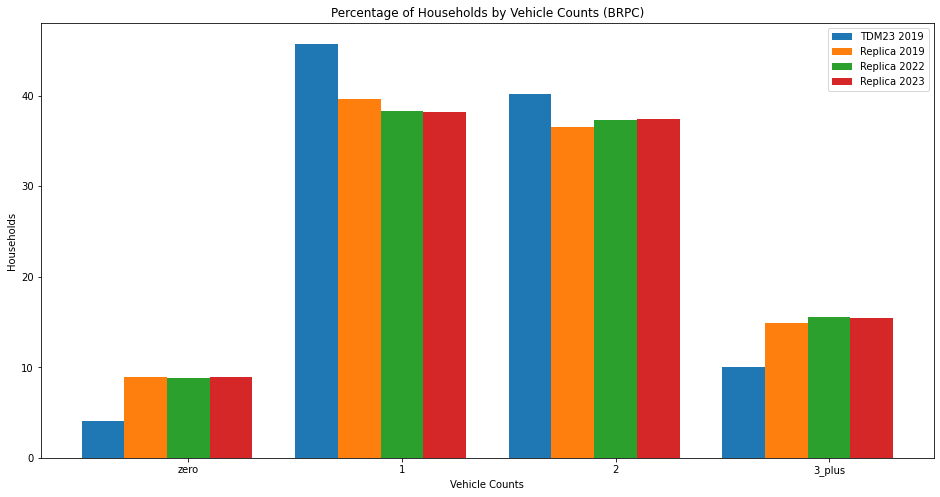

CCC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   4433   3222.0   4760   4858    3.119252    4.686839    4.778877   
1        1  33027  44853.0  34475  34073   43.422658   34.918168   34.611716   
2        2  38106  44021.0  38935  40709   42.617190   40.287998   39.089403   
3   3_plus  19018  11198.0  21435  21545   10.840901   20.106995   21.520004   

   rep23_perc  
0    4.801107  
1   33.673964  
2   40.232248  
3   21.292682  


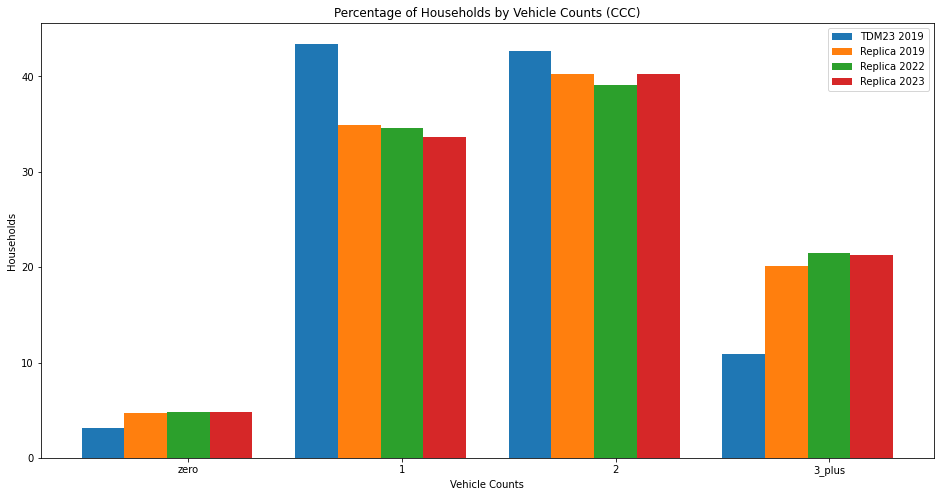

CMRPC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero  21697  12784.0  21645  21306    5.476448    9.902423    9.453947   
1        1  73673  91652.0  75345  76243   39.262153   33.624058   32.908645   
2        2  82209  95927.0  87405  85891   41.093490   37.519853   38.176124   
3   3_plus  41529  33073.0  44557  47200   14.167909   18.953667   19.461284   

   rep23_perc  
0    9.237773  
1   33.057145  
2   37.240288  
3   20.464794  


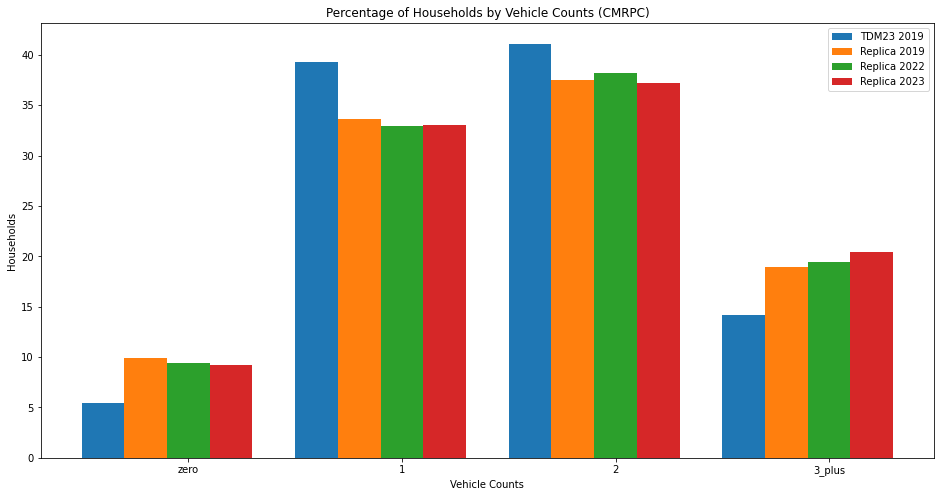

FRCOG
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   2204   1081.0   2580   2238    3.457762    7.170511    8.321775   
1        1  10731  13282.0  10681  10969   42.484726   34.912321   34.451505   
2        2  12474  13443.0  11830  12392   42.999712   40.583011   38.157598   
3   3_plus   5328   3457.0   5912   5559   11.057800   17.334158   19.069122   

   rep23_perc  
0    7.182746  
1   35.204442  
2   39.771487  
3   17.841325  


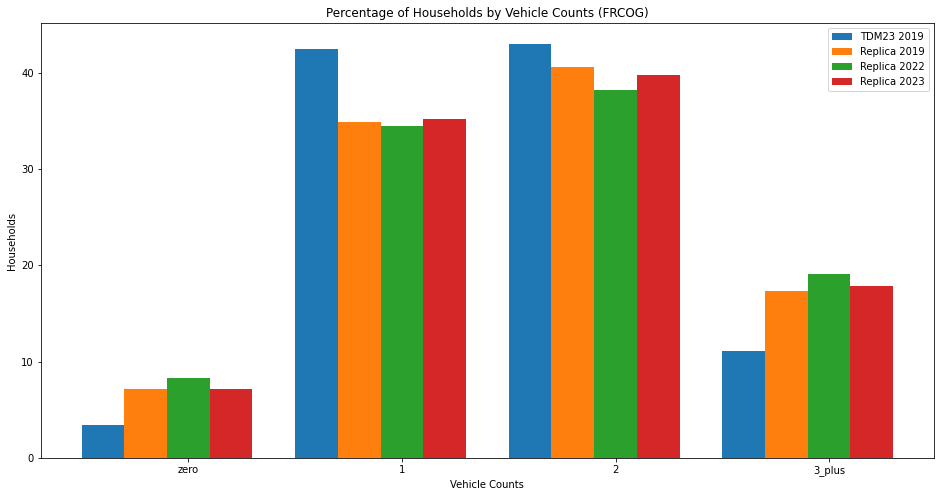

MRPC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   7108   3620.0   6868   6793    3.721829    7.649838    7.068680   
1        1  28296  36871.0  30811  32593   37.908167   30.452985   31.711283   
2        2  37623  43598.0  38495  37754   44.824395   40.490976   39.619806   
3   3_plus  19890  13175.0  20987  21756   13.545608   21.406201   21.600231   

   rep23_perc  
0    6.868832  
1   32.956844  
2   38.175457  
3   21.998867  


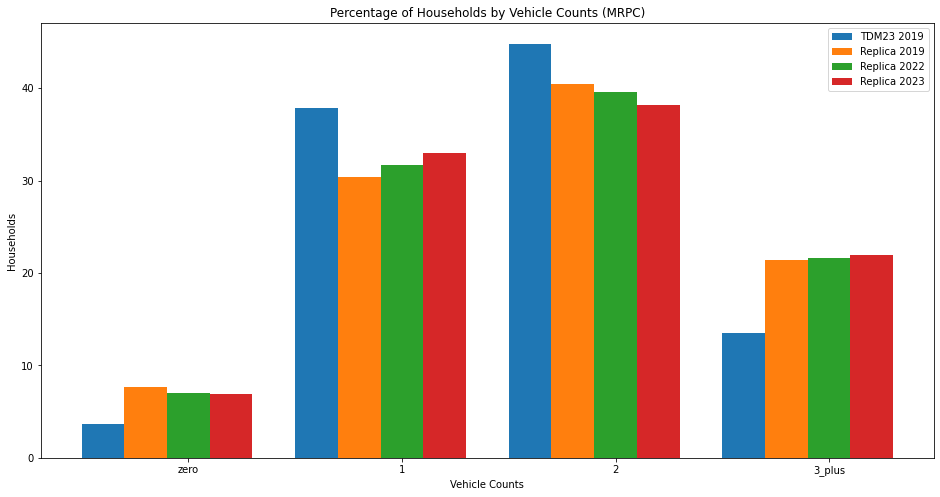

MVC
  vehicles  rep19   tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero    222   252.0    271    334    2.834008    3.079057    3.605641   
1        1   2545  3701.0   2371   2507   41.621682   35.298197   31.546035   
2        2   2832  3664.0   2497   2473   41.205578   39.278779   33.222459   
3   3_plus   1611  1275.0   2377   2291   14.338731   22.343967   31.625865   

   rep23_perc  
0    4.391847  
1   32.965155  
2   32.518080  
3   30.124918  


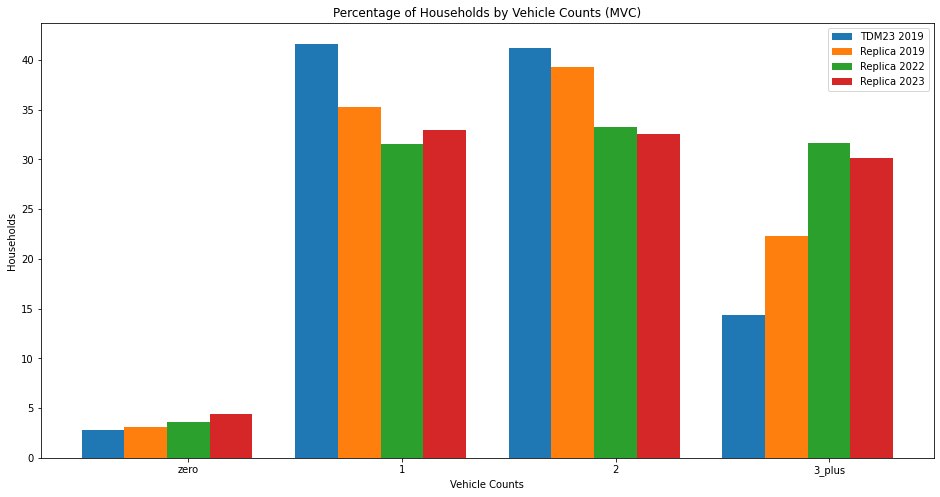

MVPC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero  12056   7044.0  13004  11607    5.120563    9.247526    9.542749   
1        1  43510  54281.0  44787  46396   39.459012   33.374243   32.866127   
2        2  50183  53810.0  52167  51219   39.116623   38.492751   38.281806   
3   3_plus  24621  22428.0  26313  27980   16.303803   18.885480   19.309317   

   rep23_perc  
0    8.459789  
1   33.815834  
2   37.331088  
3   20.393289  


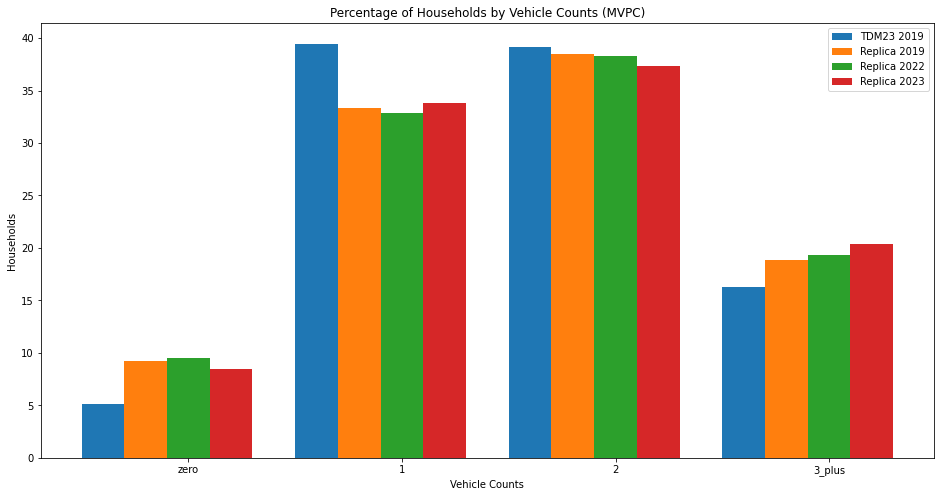

NMCOG
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   9174   5322.0   8741   8487    4.702369    8.270155    7.678995   
1        1  34068  40523.0  35206  35587   35.804978   30.711536   30.928578   
2        2  44165  48331.0  45329  44644   42.703906   39.813755   39.821664   
3   3_plus  23522  19001.0  24554  24984   16.788747   21.204554   21.570763   

   rep23_perc  
0    7.464249  
1   31.298482  
2   39.264041  
3   21.973228  


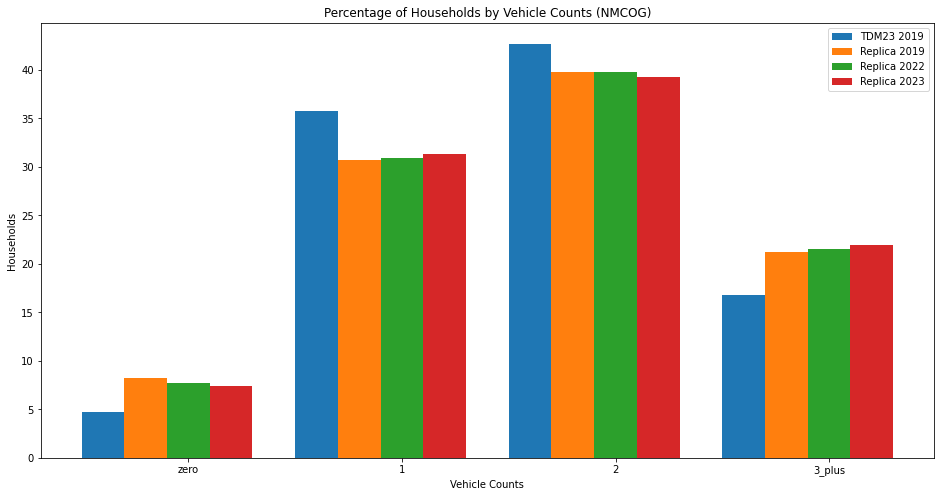

NPEDC
  vehicles  rep19   tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero    234   129.0    290    201    2.359612    5.880875    6.450178   
1        1   1166  2155.0   1185   1368   39.418328   29.303845   26.356762   
2        2   1496  2117.0   1586   2073   38.723249   37.597386   35.275801   
3   3_plus   1083  1066.0   1435   1231   19.498811   27.217894   31.917260   

   rep23_perc  
0    4.124769  
1   28.073056  
2   42.540529  
3   25.261646  


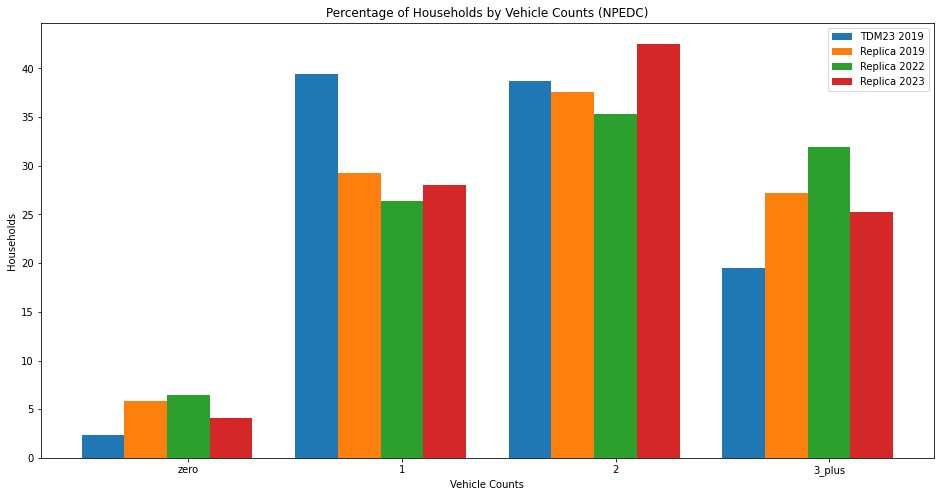

OCPC
  vehicles  rep19    tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero   9021   5235.0  10138  10231    3.657284    6.678611    7.187013   
1        1  40502  53110.0  40652  41098   37.103794   29.985267   28.818942   
2        2  54468  60738.0  57842  58336   42.432880   40.324861   41.005246   
3   3_plus  31082  24056.0  32428  33294   16.806042   23.011261   22.988799   

   rep23_perc  
0    7.156597  
1   28.748103  
2   40.806105  
3   23.289195  


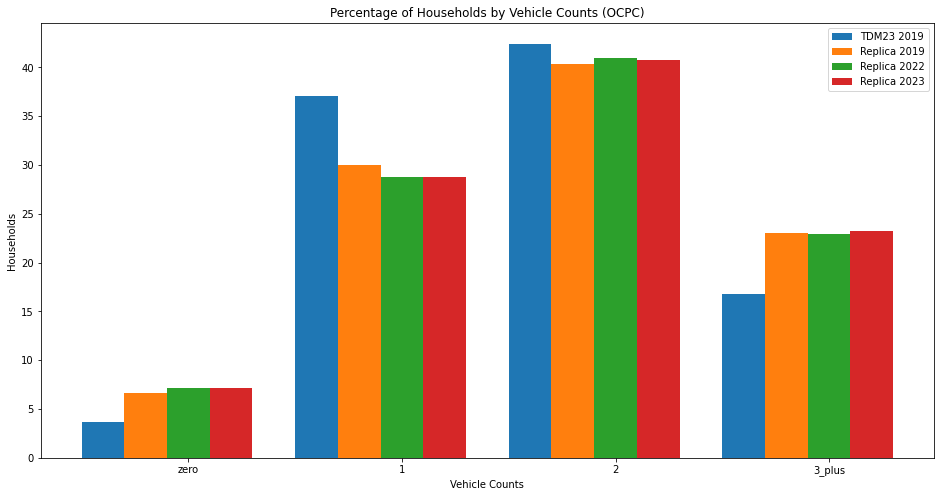

PVPC
  vehicles  rep19     tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero  27922   16801.0  26933  26450    6.774597   11.585267   11.013650   
1        1  89724  105734.0  90573  90659   42.634677   37.227867   37.037809   
2        2  83304   94883.0  85510  86005   38.259274   34.564111   34.967408   
3   3_plus  40063   30582.0  41526  41754   12.331452   16.622755   16.981132   

   rep23_perc  
0   10.801738  
1   37.023621  
2   35.123005  
3   17.051636  


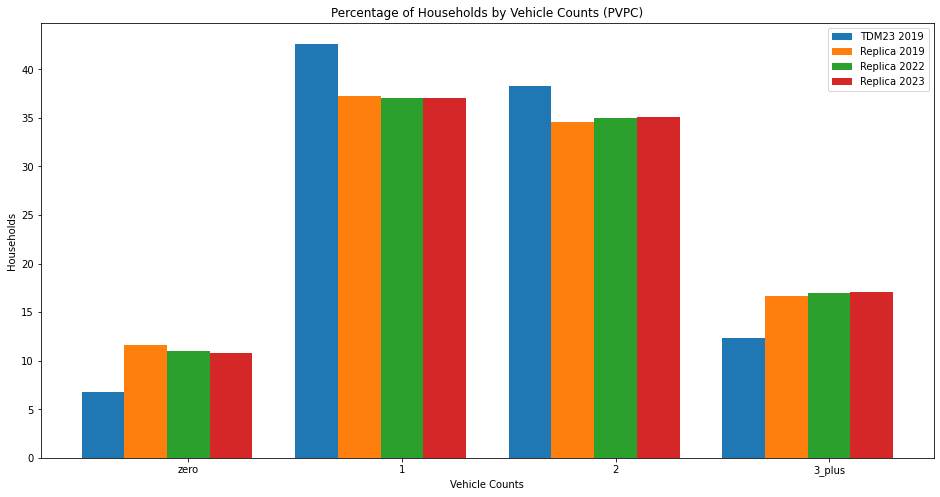

SRPEDD
  vehicles  rep19     tdm19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0     zero  24076   14765.0  23747  23594    5.654380    9.668300    9.184293   
1        1  82161  104453.0  87182  88034   40.001149   32.993735   33.718155   
2        2  91937  106945.0  94247  94086   40.955481   36.919525   36.450586   
3   3_plus  50846   34962.0  53385  54486   13.388990   20.418440   20.646965   

   rep23_perc  
0    9.067640  
1   33.833205  
2   36.159108  
3   20.940046  


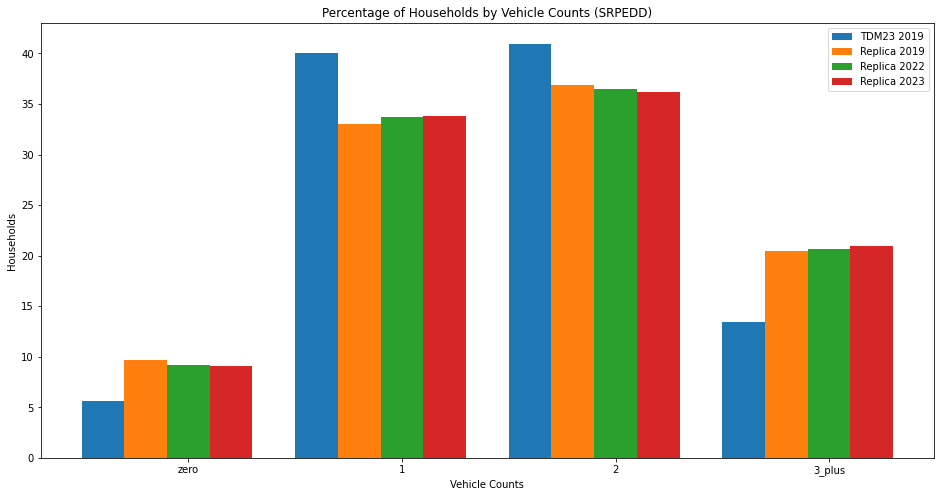

In [42]:
for mpo in mpos:
    print(mpo)
    veh_comp(csv_1, csv_2, csv_3, csv_4, mpo)

# end